Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [2]:
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/MyDrive/Assignments/"

dataset = path + "data.mat"

test_image=path+"test.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [3]:
import numpy as np
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


(32, 32, 3)

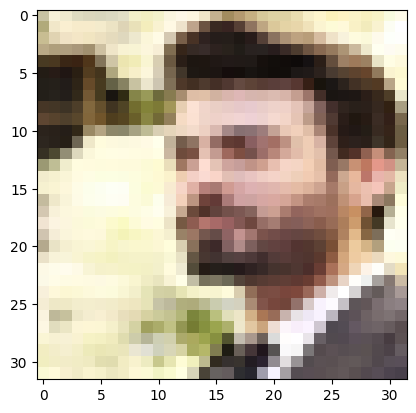

In [4]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,40])
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

You Need to write your code in this block.

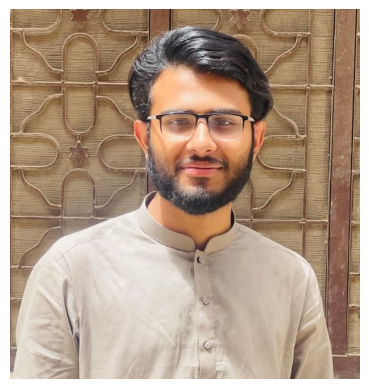

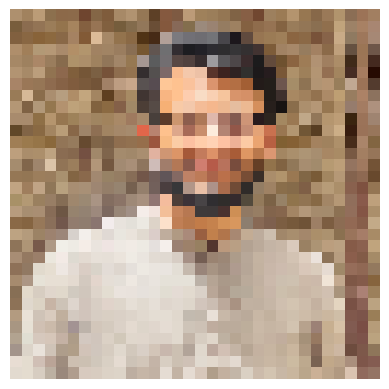

In [5]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from collections import Counter

for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

    #Read your image here
####### Your code here #######
image_path = '/content/drive/MyDrive/Assignments/MyPic.jpg'
img = Image.open(image_path)
img = np.array(img)  # Convert to numpy array
plt.imshow(img)
plt.axis('off')
plt.show()


############################
    #Resize your image
####### Your code here #######

resized_image = cv2.resize(img, (32, 32))
plt.imshow(resized_image)
plt.axis('off')
plt.show()


##############################
    #Reshape your image as we reshape the image of dataset
####### Your code here #######
reshaped_image = resized_image.flatten(order="F")
reshaped_image = reshaped_image / 255.0



#############################
    #Calculate Eucleadian distance between your image and dataset
####### Your code here #######
def euclidean_distance(image1, image2):
    return np.linalg.norm(image1 - image2)


##############################

In this Block you need to fill the code for 1-NN.

The closest match is image 42 with a distance of 15.250131317149744


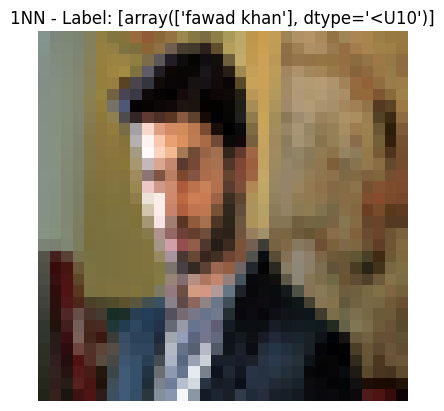

In [ ]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists

####### Your code here #######
min_distance = float('inf')
min_index = -1



for i in range(50):
    G = im[:, :, :, i]
    G = np.reshape(G, [-1], order="F") / 255.0

    distance = euclidean_distance(reshaped_image, G)
    if distance < min_distance:
        min_distance = distance
        min_index = i

# Display the closest match for 1NN
print(f"The closest match is image {min_index} with a distance of {min_distance}")
closest_image = im[:, :, :, min_index]
plt.imshow(closest_image)
plt.axis('off')
plt.title(f"1NN - Label: {labels[min_index]}")
plt.show()

##############################


Write code for 3 NN


The three closest matches are images [42, 13, 23] with distances [15.250131317149744, 15.577489945517257, 15.737870047538772]


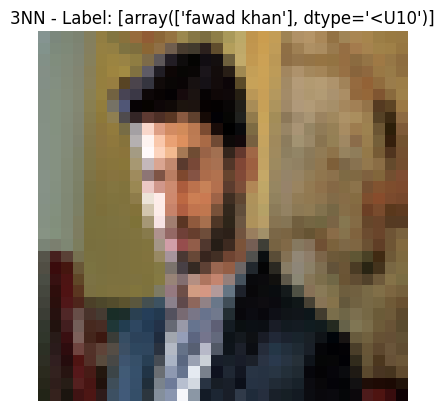

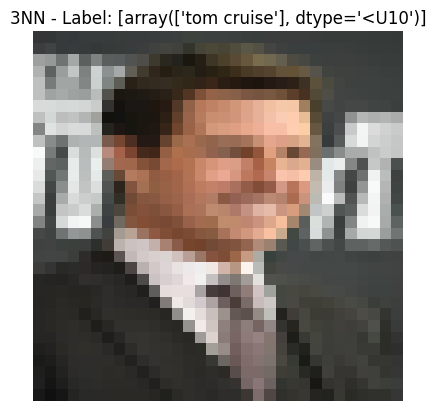

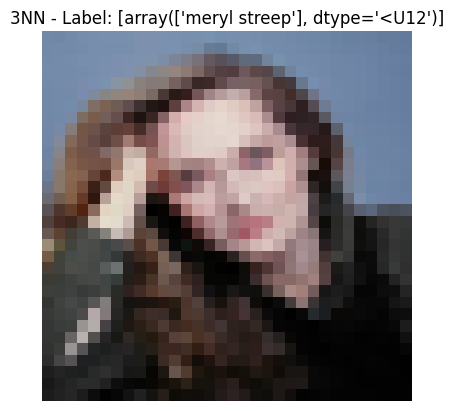

Most common label among 3 nearest neighbors: ['fawad khan']


In [ ]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######
distances = []

for i in range(50):
    G = im[:, :, :, i]
    G = np.reshape(G, [-1], order="F") / 255.0

    distance = euclidean_distance(reshaped_image, G)
    distances.append((distance, i))

distances.sort(key=lambda x: x[0])
three_min_indices = [distances[i][1] for i in range(3)]

# Display the results for 3NN
print(f"The three closest matches are images {three_min_indices} with distances {[distances[i][0] for i in range(3)]}")

# Display the three closest images for 3NN
for index in three_min_indices:
    closest_image = im[:, :, :, index]
    plt.imshow(closest_image)
    plt.axis('off')
    plt.title(f"3NN - Label: {labels[index]}")
    plt.show()

# Majority voting for 3NN
closest_labels = [str(labels[index].flatten()[0]) for index in three_min_indices]
most_common_label = Counter(closest_labels).most_common(1)[0][0]
print(f"Most common label among 3 nearest neighbors: {most_common_label}")


##############################

Write code for 5 NN

The five closest matches are images [42, 13, 23, 48, 47] with distances [15.250131317149744, 15.577489945517257, 15.737870047538772, 16.011373792849035, 16.047989354501198]


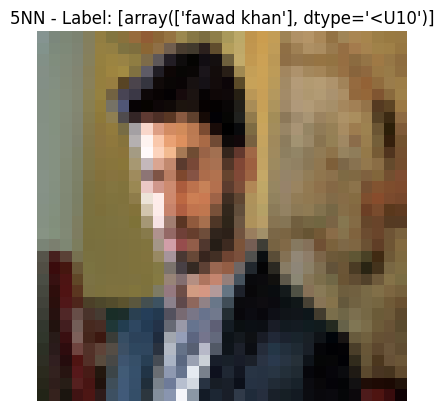

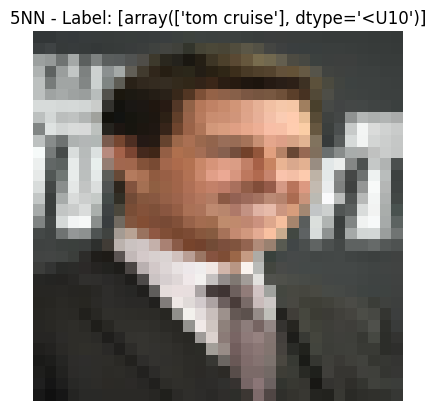

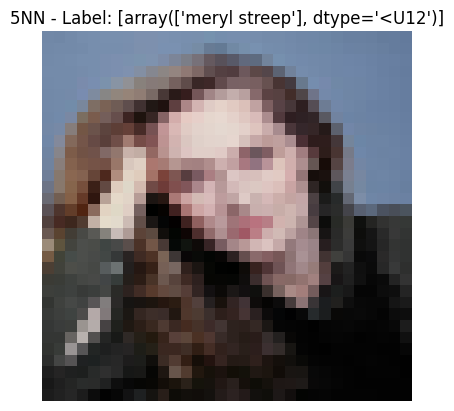

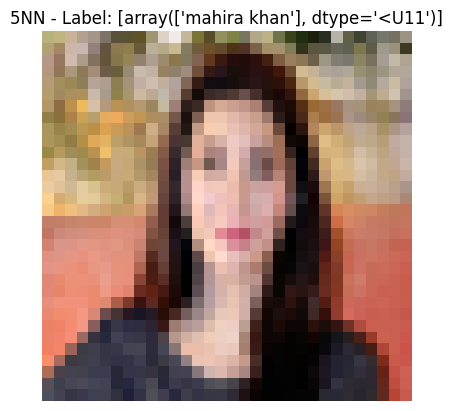

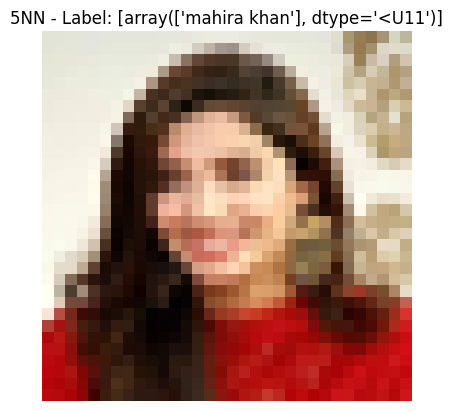

Most common label among 5 nearest neighbors: ['mahira khan']


In [ ]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######
distances = []

for i in range(50):
    G = im[:, :, :, i]
    G = np.reshape(G, [-1], order="F") / 255.0

    distance = euclidean_distance(reshaped_image, G)
    distances.append((distance, i))

distances.sort(key=lambda x: x[0])
five_min_indices = [distances[i][1] for i in range(5)]

# Display the results for 5NN
print(f"The five closest matches are images {five_min_indices} with distances {[distances[i][0] for i in range(5)]}")

# Display the five closest images for 5NN
for index in five_min_indices:
    closest_image = im[:, :, :, index]
    plt.imshow(closest_image)
    plt.axis('off')
    plt.title(f"5NN - Label: {labels[index]}")
    plt.show()

closest_labels = [str(labels[index].flatten()[0]) for index in five_min_indices]
most_common_label = Counter(closest_labels).most_common(1)[0][0]
print(f"Most common label among 5 nearest neighbors: {most_common_label}")

##############################